# Qiskit

### Codigo para la generacion de los estados de Bell

In [7]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram, plot_state_city

# Creamos un objeto Quantum Circuit que actúa sobre el registro cuántico por defecto (q) 
# de un bit (primer parámetro) y que tiene un registro clásico de un bit (segundo parámetro)
circuit = QuantumCircuit(2,2)
# Añadimos una puerta Hadamard con el qubit q_0 como entrada
circuit.h(0)
circuit.cnot(0, 1)
# Mapeamos la medida de los qubits (primer parámetro) sobre los bits clásicos
circuit.measure([0,1], [0,1])
# Dibujamos el circuito
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

### QASM_SIMULATOR

Este simulador se puede ver tanto la cantidad de resultados obtenidos como que valor tenia cada uno de ello y todos estos valores son facilmente representables en un histograma que nos permite observar mas facilmente los resultados y su relacion entre ellos para su facil comparación.


Número de ocurrencias: {'00': 503, '11': 497}


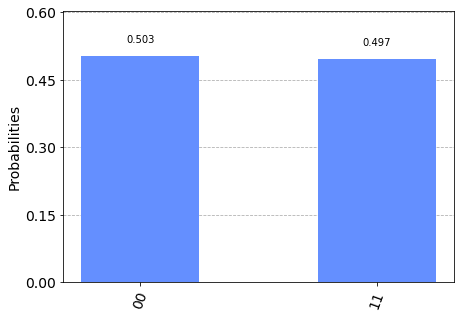

In [15]:
# Usamos el qasm_simulator de Aer
simulator_qasm = Aer.get_backend('qasm_simulator')
# Ejecutamos el circuito sobre el simulador qasm
job_qasm = execute(circuit, simulator_qasm, shots=1000)
# Almacenamos los resultados
result_qasm = job_qasm.result()
# Capturamos las ocurrencias de salida
counts_qasm = result_qasm.get_counts(circuit)
# Escribimos el número de ocurrencias
print("\nNúmero de ocurrencias:",counts_qasm)
plot_histogram(counts_qasm)

### STATEVECTOR_SIMULATOR

El statevector_simulator nos permite ver el resultado de una de las soluciones a las que se ha llegado en las 1000 iteraciones sin poder ver su frecuencia en el total de resultados.Ademas este simulador nos presenta una forma tridimensional de representar la solucion con la funcion plot_state_city.


Número de ocurrencias: {'11': 1}


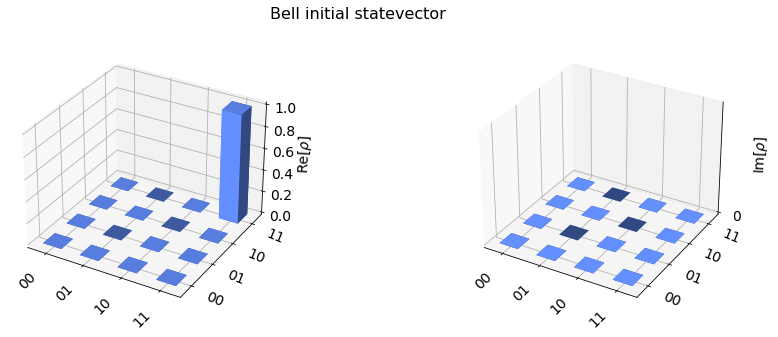

In [17]:
simulator_statevector = Aer.get_backend('statevector_simulator')
# Ejecutamos el circuito sobre el simulador qasm
job_statevector = execute(circuit, simulator_statevector, shots=1000)
# Almacenamos los resultados
result_statevector = job_statevector.result()
# Capturamos las ocurrencias de salida
counts_statevector = result_statevector.get_counts(circuit)
# Escribimos el número de ocurrencias
print("\nNúmero de ocurrencias:",counts_statevector)
plot_state_city(result_statevector.get_statevector(circuit), title="Bell initial statevector")

### UNITARY_SIMULATOR

El ultimo simulador a provar es el Unitary_simulator que como el anterior solo nos da un unico resultado en las mil ejecuciones y tampoco nos devuelve su frecuancia.Tambien observamos que la forma de visualizar este resultado es bastante diferente al resto, siendo con la funcion get_unitary que devuelve el la matriz unitaria final del experimento

In [11]:
simulator_unitary = Aer.get_backend('unitary_simulator')

circ = QuantumCircuit(2,2)
circ.h(0)
circ.cx(0, 1)

result = execute(circ, simulator_unitary, shots= 1000).result()
unitary = result.get_counts(circ)
print("Circuit unitary:\n", unitary,"\n")
result_unitary = execute(circ, simulator_unitary, shots=1000).result()
unitary = result_unitary.get_unitary(circ)
print("Bell states unitary:\n", unitary)

Circuit unitary:
 {'00': 1} 

Bell states unitary:
 [[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


### Observaciones

En defenitiva todos los simuladores utilizan las mismas operaciones para calcular los resultados obtenidos en una ejecucion, pero cada uno tiene una manera diferente de visualizar dichos resultados.